In [88]:
#importando os pacotes necessários para a manipulação

import pandas as pd
from matplotlib import pyplot as plt
from urllib.request import urlopen


In [89]:
# Criando uma função para facilitar a importação

def bcb(codigo):
    link = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    df = pd.read_json(link)
    df.index = pd.to_datetime(df['data'])
    df = df['valor']
    return df


In [90]:
#código 11 se refere à série temporal da selic no Banco Central

selic = bcb(11)

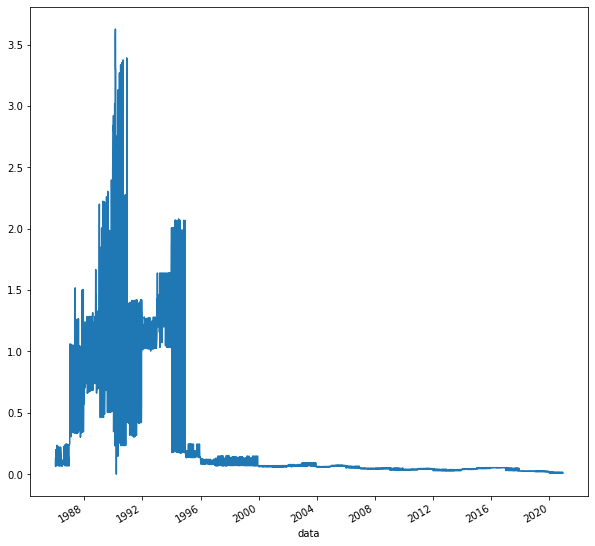

In [91]:
#plotar a série temporal inteira com a orientação default

selic.plot(figsize=(10,10));

In [92]:
#converter o dataframe em um arquivo e salvar na máquina, basta definir o tipo de arquivo, caminho e nome do mesmo

selic.to_csv('/users/stanl/Documents/Python Scripts/selic.csv')

In [93]:
#mesma coisa do anterior mas em arquivo excel

selic.to_excel('/users/stanl/Documents/Python Scripts/selic.xlsx')

In [94]:
# Criando uma função para facilitar a importação

def data_bcb(codigo):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'
    html = urlopen(url).read()
    df = pd.read_json(html)
    df.index = pd.to_datetime(df['data'])
    df = df['valor']
    return df


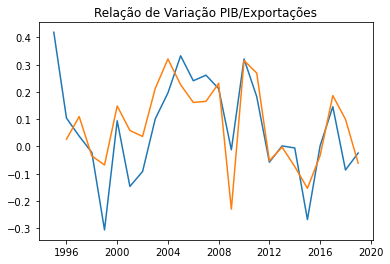

In [107]:
#Comparar a variação de dois índices e buscar entender a correção entre ambos. No caso a variação do PIB e das Exportações

exportacao = bcb(23471).pct_change()
produto = bcb(7324).pct_change().loc['1995-01-01':]
plt.plot(produto.index,produto)
plt.plot(exportacao.index,exportacao)
plt.title('Relação de Variação PIB/Exportações');


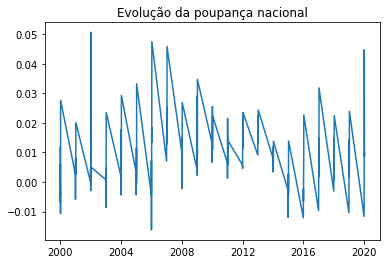

In [133]:
poupanca_nacional = bcb(7836).pct_change().loc['2000-01':]

plt.plot(poupanca_nacional.index,poupanca_nacional)


plt.title('Evolução da poupança nacional');

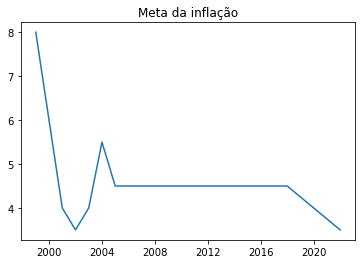

In [156]:
inflacao_meta = bcb(13521).loc['1999-01':]

plt.plot(inflacao_meta.index,inflacao_meta)


plt.title('Meta da inflação');

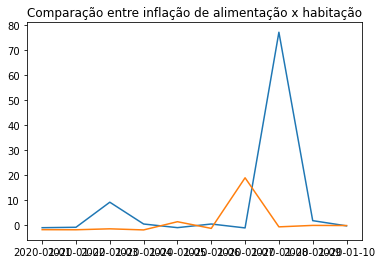

In [172]:
ipca_alimentacao = bcb(1635).pct_change().loc['2020-01':]
ipca_habitacao = bcb(1636).pct_change().loc['2020-01':]

plt.plot(ipca_alimentacao.index,ipca_alimentacao)
plt.plot(ipca_habitacao.index,ipca_habitacao)

plt.title('Comparação entre inflação de alimentação x habitação');